# **_Time Series Prediction_**
### __*Testing Different Methods of Time Series Prediction*__

<br>

### __*Import Libraries*__
### __*[DataTable](https://datatable.readthedocs.io/en/latest/start/quick-start.html)*__

In [281]:
# Datasets
import datatable as dt
import matplotlib.pyplot as plt

# Torch libraries
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split

# Device config
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
if torch.has_mps:
    device = torch.device('mps')
print('Using the Processor') if device == torch.device('cpu') else print('Using the Graphics Card')

Using the Graphics Card


<br>

### __*Prepare & Show Weather Data*__

In [282]:
# Show structure of dataset
weather_raw = dt.fread('data/seattle-weather.csv').to_pandas()
weather_raw.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


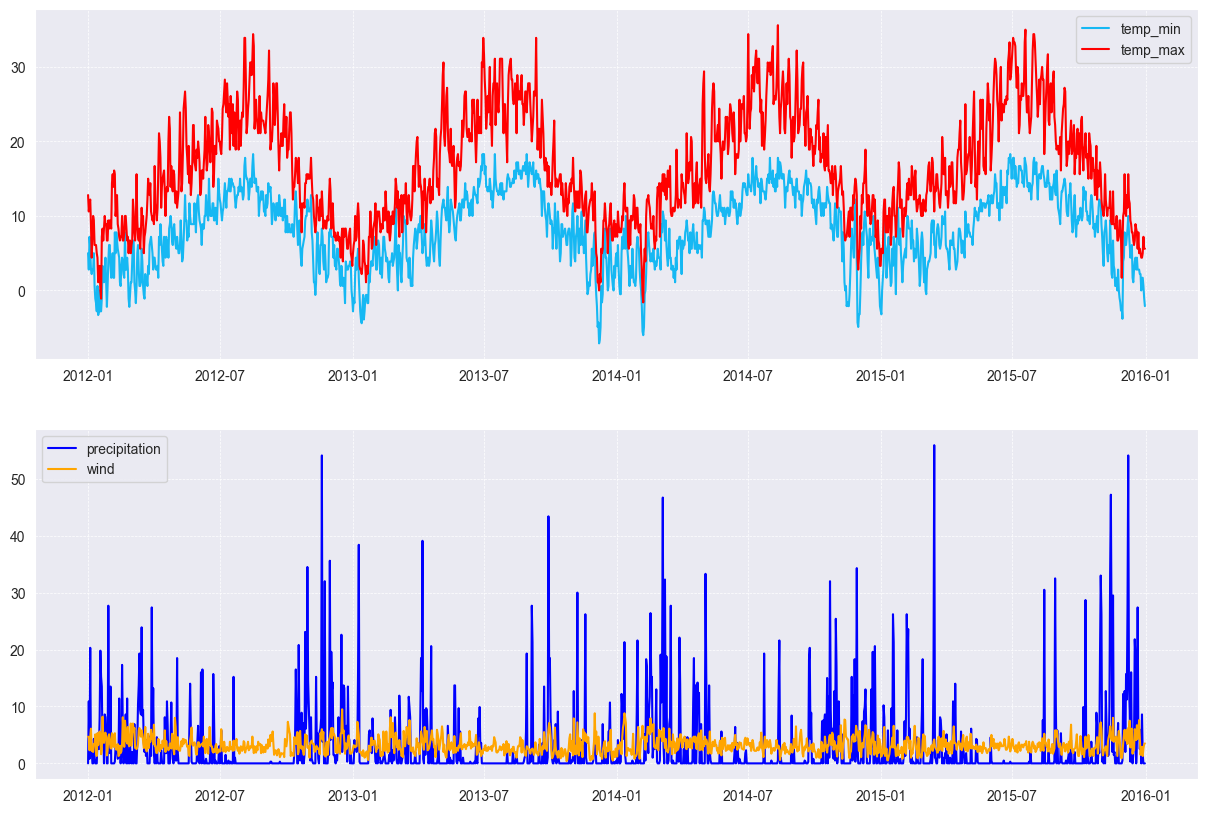

In [283]:
# Create a plot
fig_weather, axs_weather = plt.subplots(nrows=2, ncols=1, figsize=[15,10])

min_plot, = axs_weather[0].plot(weather_raw['date'], weather_raw['temp_min'],
                                label='temp_min', color='#16b8f3')
max_plot, = axs_weather[0].plot(weather_raw['date'], weather_raw['temp_max'],
                                label='temp_max', color='red')

precipitation, = axs_weather[1].plot(weather_raw['date'], weather_raw['precipitation'],
                                     label='precipitation', color='blue')
wind_plot, = axs_weather[1].plot(weather_raw['date'], weather_raw['wind'],
                                 label='wind', color='orange')

axs_weather[0].grid(linestyle='--', linewidth=0.5)
axs_weather[0].legend(handles=[min_plot, max_plot])
axs_weather[1].grid(linestyle='--', linewidth=0.5)
axs_weather[1].legend(handles=[precipitation, wind_plot])
pass

<br>

### __*Prepare & Show Google Stock Data*__

In [284]:
# Show structure of dataset
goog_raw = dt.fread('data/GOOG.csv').to_pandas()
goog_raw.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,False,True
1,GOOG,2016-06-15,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,False,True
2,GOOG,2016-06-16,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,False,True
3,GOOG,2016-06-17,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,False,True
4,GOOG,2016-06-20,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,False,True


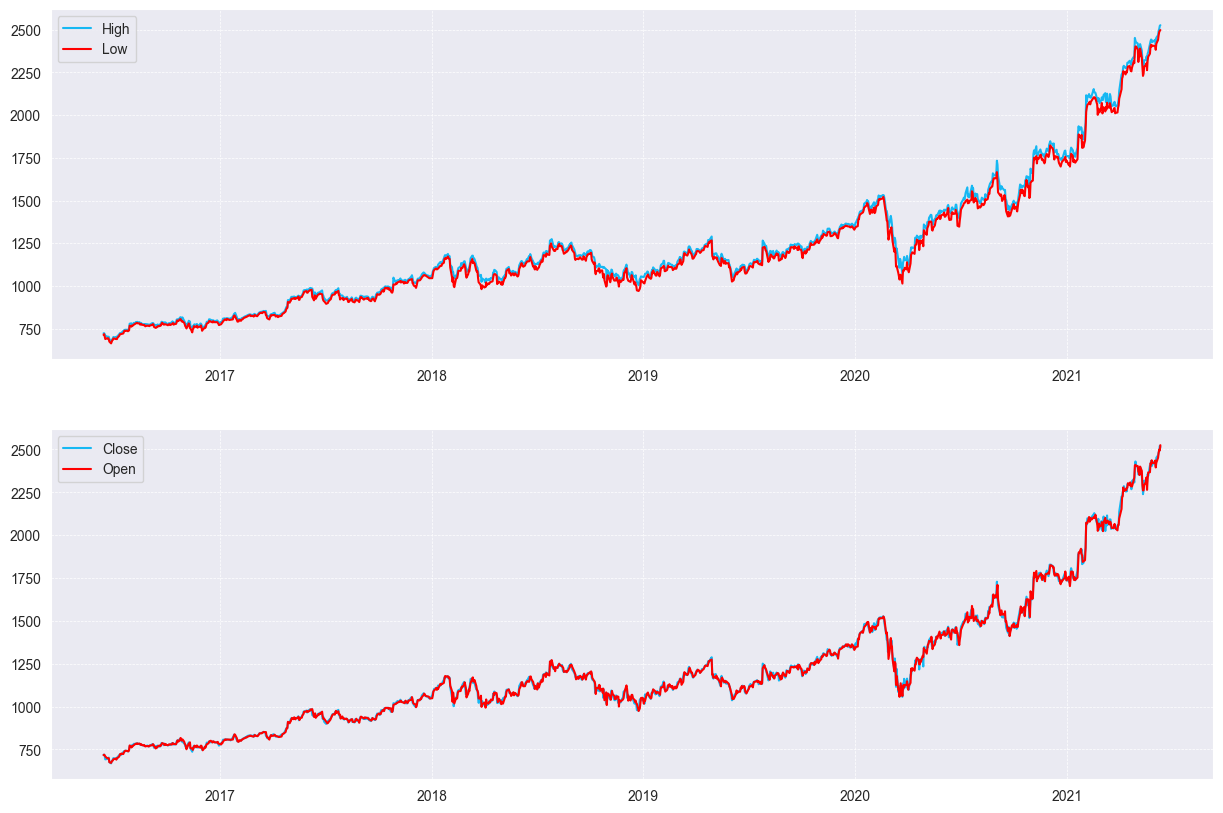

In [285]:
# Create a plot
fig_goog, axs_goog = plt.subplots(nrows=2, ncols=1, figsize=[15,10])

close_plot, = axs_goog[1].plot(goog_raw['date'], goog_raw['close'],
                               label='Close', color='#16b8f3')
high_plot, = axs_goog[0].plot(goog_raw['date'], goog_raw['high'],
                              label='High', color='#16b8f3')
low_plot, = axs_goog[0].plot(goog_raw['date'], goog_raw['low'],
                             label='Low', color='red')
open_plot, = axs_goog[1].plot(goog_raw['date'], goog_raw['open'],
                              label='Open', color='red')

axs_goog[0].grid(linestyle='--', linewidth=0.5)
axs_goog[0].legend(handles=[high_plot, low_plot])
axs_goog[1].grid(linestyle='--', linewidth=0.5)
axs_goog[1].legend(handles=[close_plot, open_plot])
pass

<br>

### __*Prepare dataset*__

In [288]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(goog_X, goog_y, test_size=0.2)

In [289]:
# Turn data into Torch Format
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

<br>

### __*Create the Model*__

Predictions:
True: 782.4400024414062, Predicted: 787.6139526367188
True: 1073.9000244140625, Predicted: 1242.76611328125
True: 1260.1099853515625, Predicted: 1145.4581298828125
True: 1899.4000244140625, Predicted: 1588.9346923828125
True: 1032.47998046875, Predicted: -4777.03759765625
True: 774.2100219726562, Predicted: 808.2119750976562
True: 1340.6199951171875, Predicted: 1316.8236083984375
True: 841.6500244140625, Predicted: 820.2059936523438
True: 1065.0, Predicted: 1008.6224975585938
True: 2421.280029296875, Predicted: 1085.964111328125
True: 1056.6199951171875, Predicted: 1254.7408447265625
True: 1146.2099609375, Predicted: 1138.1307373046875
True: 1202.949951171875, Predicted: 1176.1204833984375
True: 2249.679931640625, Predicted: 1914.6834716796875
True: 1102.22998046875, Predicted: 994.3803100585938
True: 852.1199951171875, Predicted: -139.9082794189453
True: 1506.6199951171875, Predicted: 1462.14306640625
True: 768.7000122070312, Predicted: 1084.277099609375
True: 2451.760009

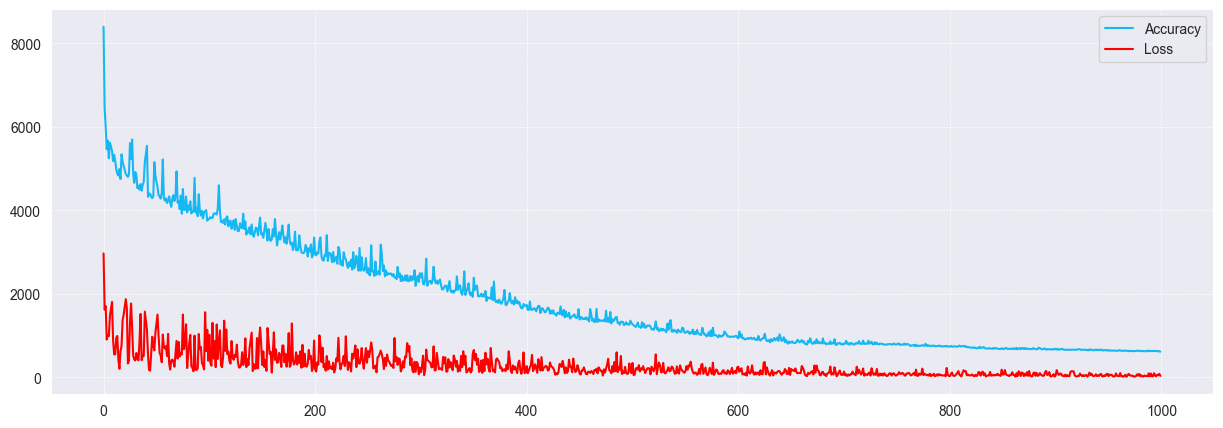

In [292]:
# Graphical representation of the learning process
fig_loss, axs_loss = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
accuracy_plot, = axs_loss.plot(accuracy, label='Accuracy', color='#16b8f3')
loss_lst_plot, = axs_loss.plot(loss_lst, label='Loss', color='red')
axs_loss.grid(linestyle='--', linewidth=0.5)
axs_loss.legend(handles=[accuracy_plot, loss_lst_plot])

predictions = model(X_test)

print("Predictions:")
for i, x in enumerate(X_test):
    print(f"True: {y_test[i]}, Predicted: {predictions[i][0]}")

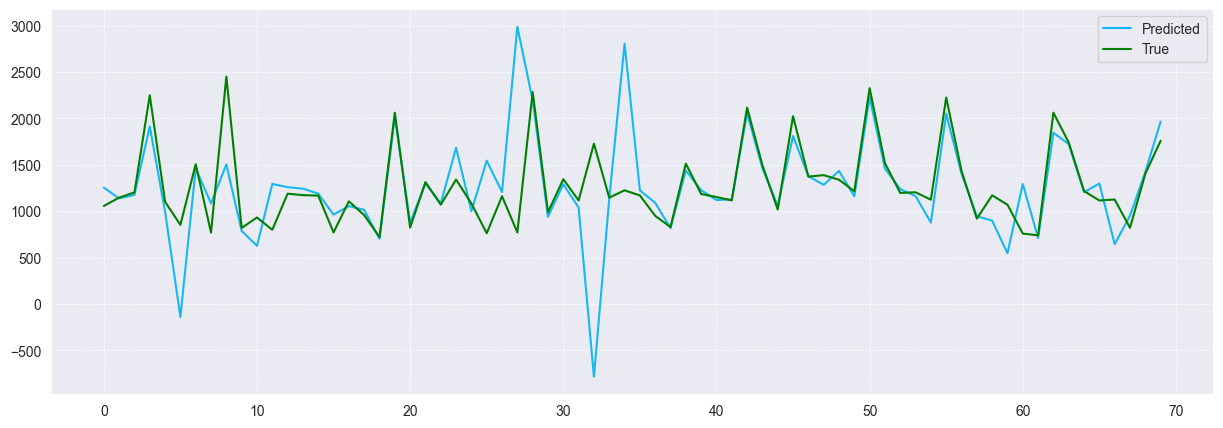

In [294]:
# Graphical representation of the model accuracy
start = 10
end = 80

fig_loss, axs_loss = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
accuracy_plot, = axs_loss.plot(predictions.detach().numpy()[start:end], label='Predicted', color='#16b8f3')
loss_lst_plot, = axs_loss.plot(y_test[start:end], label='True', color='green')
axs_loss.grid(linestyle='--', linewidth=0.5)
axs_loss.legend(handles=[accuracy_plot, loss_lst_plot])
pass